In [3]:
import importlib

import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as inte
import scipy.interpolate as interpol
import scipy.optimize as opt

import axion_mass
import g_star
import eom_solver
import density_plot
from config import plot_path, model
import runner
import potential

eom_solver = importlib.reload(eom_solver)
density_plot = importlib.reload(density_plot)
runner = importlib.reload(runner)

solver = eom_solver.EOMSolver(axion_mass.m_a_shellard, g_star.borsamyi_table, potential.cosine)

In [4]:
%%time
theta_i_s, f_a_s, Omega_a_h_sq = \
    runner.compute_density_parameter((1e-5, np.pi), (1e9, 1e19), solver , N=(10,10))

----------------------------------------

/usr/local/lib/python3.6/dist-packages/scipy/integrate/_ode.py:1177: UserWarning: dopri5: larger nsteps is needed
  self.messages.get(istate, unexpected_istate_msg)))


=

/usr/local/lib/python3.6/dist-packages/scipy/integrate/_ode.py:1177: UserWarning: dopri5: larger nsteps is needed
  self.messages.get(istate, unexpected_istate_msg)))


===CPU times: user 131 ms, sys: 111 ms, total: 242 ms
Wall time: 4min 35s


In [44]:
# np.savez("sim_shellard_borsamyi_40x40.npz", Omega_a_h_sq=Omega_a_h_sq, theta_i_s=theta_i_s, f_a_s=f_a_s)
f = np.load("sim_shellard_borsamyi_40x40.npz")
Omega_a_h_sq = f["Omega_a_h_sq"]
theta_i_s = f["theta_i_s"]
f_a_s = f["f_a_s"]

/home/janik/Documents/bachelor/Code/density_plot.py:14: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(f_a / 1e9, theta_i, np.log10(Omega_a_h_sq))


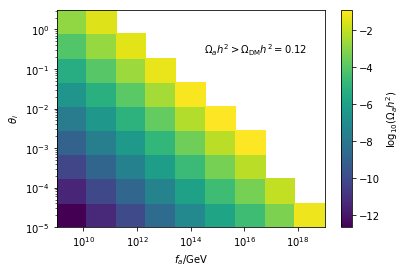

In [5]:
# plt.figure(figsize=(20,10))
density_plot.plot_density(theta_i_s, f_a_s, Omega_a_h_sq, plot_type="pcolormesh")

In [6]:
R_a = Omega_a_h_sq / model.Omega_DM_h_sq
R_a_avg = 1 / (theta_i_s[-1] - theta_i_s[0]) * inte.simps(R_a, theta_i_s, axis=0)

Text(0,0.5,'$\\theta_0$')

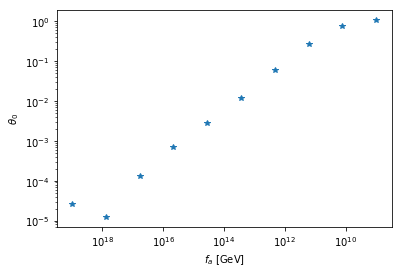

In [7]:
def solve_inital_theta(i, f_a):
    R_a_interp = interpol.interp1d(theta_i_s, R_a[:, i], bounds_error=False)
    try:
        return opt.root(lambda theta: R_a_interp(theta) - 1.0, 1.0).x[0]
    except ValueError as e:
        print(e.args)
        return np.NAN

theta_0 = np.array([solve_inital_theta(i, f_a) for i, f_a in enumerate(f_a_s)])

# print(theta_0)

plt.loglog(f_a_s / 1e9, theta_0, "*")
plt.gca().invert_xaxis()
plt.xlabel("$f_a$ [GeV]")
plt.ylabel(r"$\theta_0$")